In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import hdbscan

In [3]:
data = pd.read_csv('../../Body/1Raw/MitoBreakDB_12122019.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 14 columns):
Deletions                          1313 non-null object
5' breakpoint                      1313 non-null object
3' breakpoint                      1313 non-null object
Deletion length - bp               1313 non-null object
Deletion of replication origins    1313 non-null object
Location of the deleted region     1313 non-null object
Single mtDNA deletions             153 non-null object
Multiple mtDNA deletions           331 non-null object
Healthy tissues                    308 non-null object
Parkinson Disease                  26 non-null object
Inclusion Body Myositis            48 non-null object
Tumour                             94 non-null object
Other clinical features            558 non-null object
References                         1313 non-null object
dtypes: object(14)
memory usage: 143.7+ KB


In [5]:
data.head()

,Deletions,5' breakpoint,3' breakpoint,Deletion length - bp,Deletion of replication origins,Location of the deleted region,Single mtDNA deletions,Multiple mtDNA deletions,Healthy tissues,Parkinson Disease,Inclusion Body Myositis,Tumour,Other clinical features,References
0,83:16095,83,16095,16011,OH and OL,Removing full minor and part o(...),NaN,Patients with pathogenic MGME1(...),NaN,NaN,NaN,NaN,NaN,[327]
1,105:112,105,112,6,None,Inside the major arc,NaN,NaN,Normal tissues (polymorphism),NaN,NaN,NaN,NaN,[53-57]
2,114:12305,114,12305,12190,OH and OL,Removing full minor and part o(...),NaN,Patients with pathogenic MGME1(...),NaN,NaN,NaN,NaN,NaN,[327]
3,167:16223,167,16223,16055,OH and OL,Removing full minor and part o(...),NaN,Patients with pathogenic MGME1(...),NaN,NaN,NaN,NaN,NaN,[327]
4,174:3623,174,3623,3448,OH,Removing part of minor and maj(...),NaN,NaN,NaN,NaN,NaN,NaN,Skeletal muscle biopsies and �(...),[329]


In [6]:
data['Location of the deleted region'].value_counts()

Inside the major arc                   1082
Removing part of minor and maj(...)     192
Inside the minor arc                     28
Removing full minor and part o(...)      10
Location of the deleted region            1
Name: Location of the deleted region, dtype: int64

In [7]:
data['Deletion of replication origins'].value_counts()

None                               1110
OL                                  187
OH and OL                            10
OH                                    5
Deletion of replication origins       1
Name: Deletion of replication origins, dtype: int64

In [8]:
breakpoints = data[["5' breakpoint", "3' breakpoint"]][:-1].copy()

In [9]:
breakpoints.columns = ['five', 'three']

In [10]:
breakpoints.five = breakpoints.five.astype(int)
breakpoints.three = breakpoints.three.astype(int)

In [11]:
breakpoints.loc[breakpoints.five < 110, 'five'] += 16569
breakpoints.loc[breakpoints.three < 110, 'three'] += 16569

In [12]:
breakpoints = breakpoints[(breakpoints.five > 5781)&(breakpoints.three > 5781)]

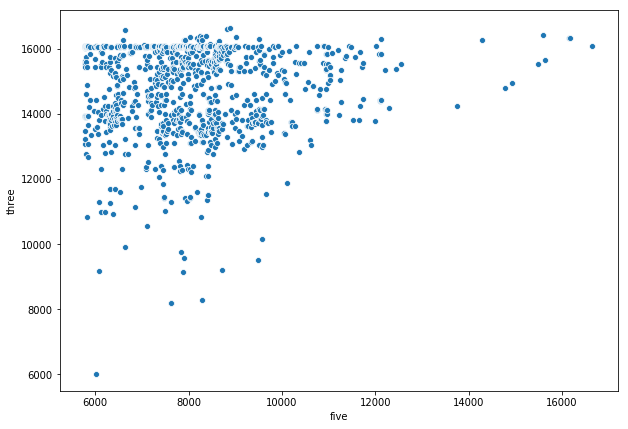

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=breakpoints, x='five', y='three')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


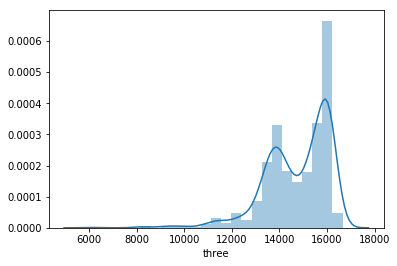

In [14]:
sns.distplot(breakpoints.three)

In [15]:
counts, bins = np.histogram(breakpoints.three, bins=100)

In [16]:
counts[np.argmax(counts)]

242

In [17]:
bins[np.argmax(counts):np.argmax(counts)+2]

array([16016.26, 16122.55])

In [18]:
np.histogram(breakpoints[(breakpoints.three > bins[np.argmax(counts)])&(breakpoints.three < bins[np.argmax(counts)+2])].three, bins=20)

(array([  1,   1,   3,   2,   2,   2, 127,  92,  10,   1,   1,   0,   0,
          0,   1,   0,   1,   0,   2,   1]),
 array([16020. , 16027.5, 16035. , 16042.5, 16050. , 16057.5, 16065. ,
        16072.5, 16080. , 16087.5, 16095. , 16102.5, 16110. , 16117.5,
        16125. , 16132.5, 16140. , 16147.5, 16155. , 16162.5, 16170. ]))

In [19]:
breakpoints = breakpoints[(breakpoints.three < 16062) | (breakpoints.three >  16078.75)]

In [20]:
clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon = 50
                            #, cluster_selection_method='leaf'
                            , min_samples=10                            
                           )
clusters  =clusterer.fit_predict(breakpoints)

In [21]:
colors = sns.color_palette('hls', len(np.unique(clusters))-1)

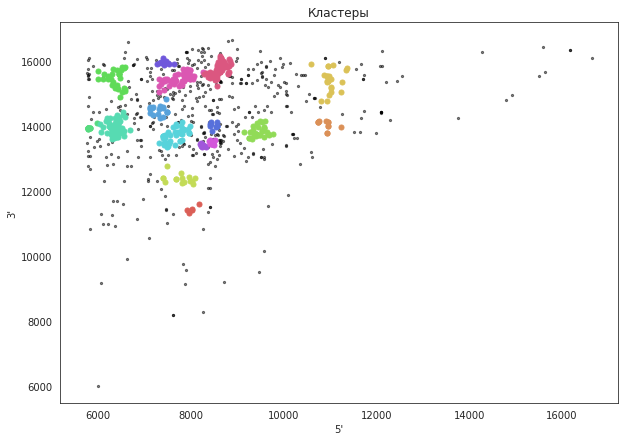

In [22]:
sns.set_style('white')
plt.figure(figsize=(10,7))

x = breakpoints.five[clusters == -1]
y = breakpoints.three[clusters == -1]
plt.scatter(x, y, color='black', alpha=0.5, s=5)

for c, color in list(zip(range(0, np.max(clusters)+1), colors)):
    x = breakpoints.five[clusters == c]
    y = breakpoints.three[clusters == c]
    plt.scatter(x, y, color=color, s=25)
plt.xlabel("5'")
plt.ylabel("3'")
plt.title('Кластеры')
plt.savefig('../../Body/4Figures/clusters.png')